In [13]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


%matplotlib inline

In [14]:
import os
import glob

In [17]:
station_data = pd.read_csv("data/station_data.csv")

In [18]:
station_data.head()

,Unnamed: 0.1,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,17568,17568,68,2021-01-01 00:00:03,2020-12-31 23:56:45,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153
1,17569,17569,68,2021-01-01 00:05:03,2020-12-31 23:56:45,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153
2,17570,17570,68,2021-01-01 00:10:03,2021-01-01 00:06:54,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153
3,17571,17571,68,2021-01-01 00:15:03,2021-01-01 00:06:54,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153
4,17572,17572,68,2021-01-01 00:20:02,2021-01-01 00:17:03,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153


In [19]:
data2 = station_data.copy()

In [20]:
data2['usage'] = data2['AVAILABLE BIKES'].diff()
data2.head()

,Unnamed: 0.1,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
0,17568,17568,68,2021-01-01 00:00:03,2020-12-31 23:56:45,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,NaN
1,17569,17569,68,2021-01-01 00:05:03,2020-12-31 23:56:45,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
2,17570,17570,68,2021-01-01 00:10:03,2021-01-01 00:06:54,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
3,17571,17571,68,2021-01-01 00:15:03,2021-01-01 00:06:54,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
4,17572,17572,68,2021-01-01 00:20:02,2021-01-01 00:17:03,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0


In [21]:
data2["usage"].isnull().values.any()

True

In [22]:
data2["usage"].isnull().sum()

1

#### Creating dataframes for each station

In [23]:
mask_hanover = data2.NAME == "HANOVER QUAY"
mask_fitzwilliam = data2.NAME == "FITZWILLIAM SQUARE EAST"
mask_james = data2.NAME == "ST JAMES HOSPITAL (LUAS)"

hanover_data = data2[mask_hanover]
fitzwilliam_data = data2[mask_fitzwilliam]
james_data = data2[mask_james]

In [24]:
hanover_data['usage'] = hanover_data['AVAILABLE BIKES'].diff()
hanover_data

,Unnamed: 0.1,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
0,17568,17568,68,2021-01-01 00:00:03,2020-12-31 23:56:45,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,NaN
1,17569,17569,68,2021-01-01 00:05:03,2020-12-31 23:56:45,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
2,17570,17570,68,2021-01-01 00:10:03,2021-01-01 00:06:54,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
3,17571,17571,68,2021-01-01 00:15:03,2021-01-01 00:06:54,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
4,17572,17572,68,2021-01-01 00:20:02,2021-01-01 00:17:03,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307905,11269695,2762256,68,2022-01-01 23:35:02,2022-01-01 23:31:51,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
307906,11269696,2762257,68,2022-01-01 23:40:02,2022-01-01 23:31:51,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
307907,11269697,2762258,68,2022-01-01 23:45:02,2022-01-01 23:41:57,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
307908,11269698,2762259,68,2022-01-01 23:50:02,2022-01-01 23:45:15,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0


In [25]:
hanover_data["usage"].isnull().sum()

1

In [26]:
fitzwilliam_data['usage'] = fitzwilliam_data['AVAILABLE BIKES'].diff()
fitzwilliam_data

,Unnamed: 0.1,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
576,23040,23040,89,2021-01-01 00:00:03,2020-12-31 23:52:56,FITZWILLIAM SQUARE EAST,40,12,28,Open,Fitzwilliam Square East,53.335213,-6.2509,NaN
577,23041,23041,89,2021-01-01 00:05:03,2021-01-01 00:03:05,FITZWILLIAM SQUARE EAST,40,12,28,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
578,23042,23042,89,2021-01-01 00:10:03,2021-01-01 00:03:05,FITZWILLIAM SQUARE EAST,40,12,28,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
579,23043,23043,89,2021-01-01 00:15:03,2021-01-01 00:13:14,FITZWILLIAM SQUARE EAST,40,12,28,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
580,23044,23044,89,2021-01-01 00:20:02,2021-01-01 00:13:14,FITZWILLIAM SQUARE EAST,40,12,28,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308481,11275167,2767728,89,2022-01-01 23:35:02,2022-01-01 23:25:57,FITZWILLIAM SQUARE EAST,40,25,15,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
308482,11275168,2767729,89,2022-01-01 23:40:02,2022-01-01 23:36:03,FITZWILLIAM SQUARE EAST,40,25,15,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
308483,11275169,2767730,89,2022-01-01 23:45:02,2022-01-01 23:36:03,FITZWILLIAM SQUARE EAST,40,25,15,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0
308484,11275170,2767731,89,2022-01-01 23:50:02,2022-01-01 23:46:09,FITZWILLIAM SQUARE EAST,40,25,15,Open,Fitzwilliam Square East,53.335213,-6.2509,0.0


In [27]:
fitzwilliam_data["usage"].isnull().sum()

1

In [28]:
james_data["usage"] = james_data["AVAILABLE BIKES"].diff()
james_data

,Unnamed: 0.1,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
288,20736,20736,80,2021-01-01 00:00:03,2020-12-31 23:57:21,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951,NaN
289,20737,20737,80,2021-01-01 00:05:03,2020-12-31 23:57:21,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
290,20738,20738,80,2021-01-01 00:10:03,2021-01-01 00:07:30,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
291,20739,20739,80,2021-01-01 00:15:03,2021-01-01 00:07:30,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
292,20740,20740,80,2021-01-01 00:20:02,2021-01-01 00:17:39,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308193,11272863,2765424,80,2022-01-01 23:35:02,2022-01-01 23:32:01,ST JAMES HOSPITAL (LUAS),40,31,8,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
308194,11272864,2765425,80,2022-01-01 23:40:02,2022-01-01 23:32:01,ST JAMES HOSPITAL (LUAS),40,31,8,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
308195,11272865,2765426,80,2022-01-01 23:45:02,2022-01-01 23:42:08,ST JAMES HOSPITAL (LUAS),40,31,8,Open,St James Hospital (Luas),53.341358,-6.292951,0.0
308196,11272866,2765427,80,2022-01-01 23:50:02,2022-01-01 23:42:08,ST JAMES HOSPITAL (LUAS),40,31,8,Open,St James Hospital (Luas),53.341358,-6.292951,0.0


In [29]:
james_data["usage"].isnull().sum()

1

### Plotting usage column over a given week.
Monday 4th January to Sunday 10th January

In [30]:
week_of_interest = ["2021-01-04",
                    "2021-01-05",
                    "2021-01-06",
                    "2021-01-07",
                    "2021-01-08",
                    "2021-01-09",
                    "2021-01-10"]

In [31]:
hanover_dates = pd.to_datetime(hanover_data.TIME, format = "%Y-%m-%d %H:%M:%S")

In [32]:
print(hanover_dates)

0        2021-01-01 00:00:03
1        2021-01-01 00:05:03
2        2021-01-01 00:10:03
3        2021-01-01 00:15:03
4        2021-01-01 00:20:02
                 ...        
307905   2022-01-01 23:35:02
307906   2022-01-01 23:40:02
307907   2022-01-01 23:45:02
307908   2022-01-01 23:50:02
307909   2022-01-01 23:55:02
Name: TIME, Length: 103553, dtype: datetime64[ns]


In [33]:
hanover_dates.dt.date

0         2021-01-01
1         2021-01-01
2         2021-01-01
3         2021-01-01
4         2021-01-01
             ...    
307905    2022-01-01
307906    2022-01-01
307907    2022-01-01
307908    2022-01-01
307909    2022-01-01
Name: TIME, Length: 103553, dtype: object

In [34]:
hanover_dates.dt.hour == 0

0          True
1          True
2          True
3          True
4          True
          ...  
307905    False
307906    False
307907    False
307908    False
307909    False
Name: TIME, Length: 103553, dtype: bool

In [35]:
date_vector_h = pd.DatetimeIndex(hanover_dates.dt.date)
print(date_vector_h)

DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01',
               ...
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='TIME', length=103553, freq=None)


In [36]:
day_index_h1 = date_vector_h == "2021-01-04"
day_index_h2 = date_vector_h == "2021-01-05"
day_index_h3 = date_vector_h == "2021-01-06"
day_index_h4 = date_vector_h == "2021-01-07"
day_index_h5 = date_vector_h == "2021-01-08"
day_index_h6 = date_vector_h == "2021-01-09"
day_index_h7 = date_vector_h == "2021-01-10"

In [37]:
hanover_data[day_index_h1]

,Unnamed: 0.1,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
2592,111744,111744,68,2021-01-04 00:00:02,2021-01-03 23:54:28,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
2593,111745,111745,68,2021-01-04 00:05:03,2021-01-04 00:04:36,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
2594,111746,111746,68,2021-01-04 00:10:03,2021-01-04 00:04:36,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
2595,111747,111747,68,2021-01-04 00:15:03,2021-01-04 00:14:45,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
2596,111748,111748,68,2021-01-04 00:20:02,2021-01-04 00:14:45,HANOVER QUAY,40,21,19,Open,Hanover Quay,53.344116,-6.237153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,112027,112027,68,2021-01-04 23:35:02,2021-01-04 23:25:58,HANOVER QUAY,40,25,15,Open,Hanover Quay,53.344116,-6.237153,0.0
2876,112028,112028,68,2021-01-04 23:40:02,2021-01-04 23:36:06,HANOVER QUAY,40,25,15,Open,Hanover Quay,53.344116,-6.237153,0.0
2877,112029,112029,68,2021-01-04 23:45:03,2021-01-04 23:36:06,HANOVER QUAY,40,25,15,Open,Hanover Quay,53.344116,-6.237153,0.0
2878,112030,112030,68,2021-01-04 23:50:03,2021-01-04 23:46:15,HANOVER QUAY,40,25,15,Open,Hanover Quay,53.344116,-6.237153,0.0


In [38]:
hanover_day_of_interest1 = hanover_dates[day_index_h1]
hanover_day_of_interest2 = hanover_dates[day_index_h2]

In [39]:
type(hanover_day_of_interest1.dt.hour)
type(hanover_day_of_interest2.dt.hour)

pandas.core.series.Series

In [40]:
time_w1 = hanover_day_of_interest1

In [41]:
time_w1

2592   2021-01-04 00:00:02
2593   2021-01-04 00:05:03
2594   2021-01-04 00:10:03
2595   2021-01-04 00:15:03
2596   2021-01-04 00:20:02
               ...        
2875   2021-01-04 23:35:02
2876   2021-01-04 23:40:02
2877   2021-01-04 23:45:03
2878   2021-01-04 23:50:03
2879   2021-01-04 23:55:03
Name: TIME, Length: 288, dtype: datetime64[ns]

### Creating a function in python that calculates the total amount of changes in a day

In [68]:
def total_bike_changes(yyyymmdd, dataset, station_name):
    dates = pd.to_datetime(dataset.TIME, format = "%Y-%m-%d %H:%M:%S")
    date_vector = pd.DatetimeIndex(dates.dt.date)
    day_index = date_vector == yyyymmdd
    
    day_of_interest = dates[day_index]
    time = day_of_interest.dt.hour
    usage = dataset[day_index]["usage"]
    print(sum(abs(usage)))    

In [69]:
total_bike_changes("2021-01-04", hanover_data, "Hanover Quay")

48.0


In [70]:
total_bike_changes("2021-07-04", hanover_data, "Hanover Quay")

83.0


### Creating a function in python that plots use of bike stops over a day.

In [62]:
def plot_usage(yyyymmdd, dataset, station_name):
    dates = pd.to_datetime(dataset.TIME, format = "%Y-%m-%d %H:%M:%S")
    date_vector = pd.DatetimeIndex(dates.dt.date)
    day_index = date_vector == yyyymmdd
    
    day_of_interest = dates[day_index]
    time = day_of_interest.dt.hour
    usage = dataset[day_index]["usage"]
    stands = dataset[day_index]["AVAILABLE BIKE STANDS"]
    bikes = dataset[day_index]["AVAILABLE BIKES"]
    
    plt.figure()
    plt.title(f"Usage of {station_name} station on the {yyyymmdd}")
    plt.plot(time, stands, "k")
    plt.xlabel("Hours of the day")
    plt.ylabel("Available bike stands")
    
    plt.figure()
    plt.plot(time, bikes, "b")
    plt.xlabel("Hours of the day")
    plt.ylabel("Available bikes")
    
    plt.figure()
    plt.plot(time, abs(usage), "b")
    plt.xlabel("Hours of the day")
    plt.ylabel("Usage")
    plt.show()
    
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    fig.suptitle(f'Usage of the {station_name} station on the {yyyymmdd}')
    ax1.bar(time, stands)
    ax1.set_xlabel('Hours of the day')
    ax1.set_ylabel('Available bike stands')
    ax2.bar(time, bikes)
    ax2.set_xlabel('Hours of the day')
    ax2.set_ylabel('Available bikes')
    ax3.bar(time, abs(usage))
    ax3.set_xlabel("Hours of the day")
    ax3.set_ylabel("Usage")
    ax3.axhline(y = 0, color = "k")
    plt.show()


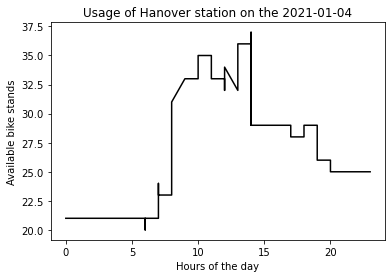

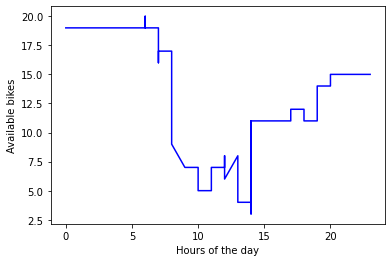

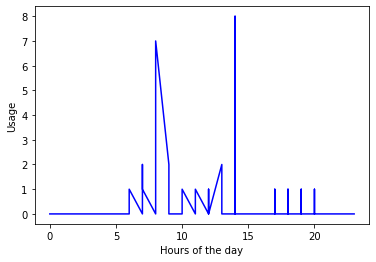

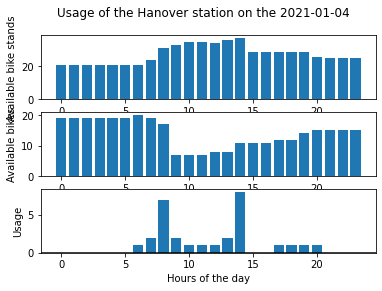

In [63]:
plot_usage("2021-01-04", hanover_data, "Hanover")

In [64]:
def plot_usage1(yyyymmdd, dataset, station_name):
    
    dates = pd.to_datetime(dataset.TIME, format = "%Y-%m-%d %H:%M:%S")
    date_vector = pd.DatetimeIndex(dates.dt.date)
    day_index = date_vector == yyyymmdd
    
    day_of_interest = dates[day_index]
    time = day_of_interest.dt.hour
    usage = dataset[day_index]["usage"]
    stands = dataset[day_index]["AVAILABLE BIKE STANDS"]
    bikes = dataset[day_index]["AVAILABLE BIKES"]
    
    fig, (ax3) = plt.subplots(1)
    
    fig.suptitle(f'Usage of the {station_name} station on the {yyyymmdd}')
    ax3.bar(time, abs(usage))
    ax3.set_xlabel("Hours of the day")
    ax3.set_ylabel("Usage")
    ax3.axhline(y = 0, color = "k")
    plt.show()
    
    

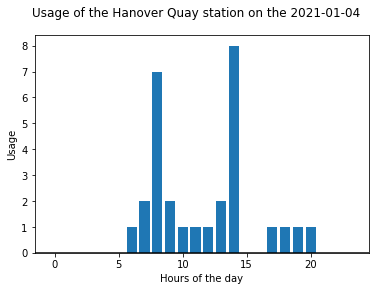

In [65]:
plot_usage1("2021-01-04", hanover_data, "Hanover Quay")

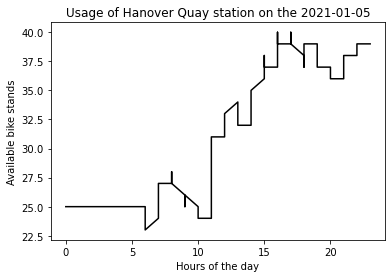

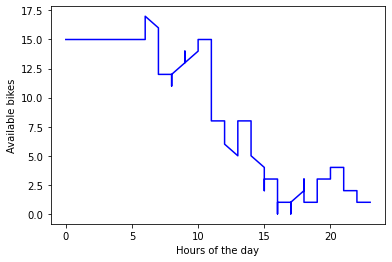

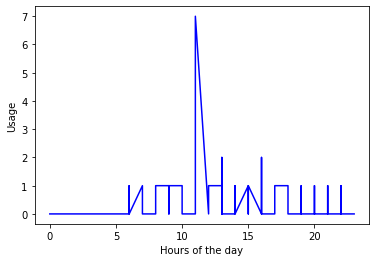

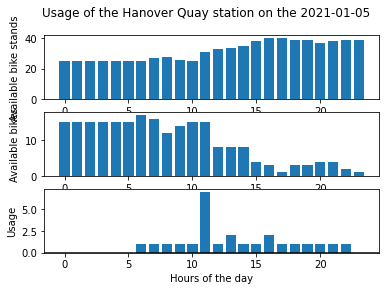

In [66]:
plot_usage("2021-01-05", hanover_data, "Hanover Quay")